In [1]:
from phobert_svm_pipeline import prepare_and_save_embeddings_v2

DATAREAL_DIR = 'dataset/data_real_full_description_clean.csv'

prepare_and_save_embeddings_v2(
    DATAREAL_DIR,
    title_col='title',
    content_col='description',
    label_col='label',
    save_dir="models/embeddings_real"
)

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>> Loading PhoBERT from local: models/phobert-base
>> Loaded 7515 samples
>> Embedding full dataset with PhoBERT...
>> Saved:
   X_emb.npy shape: (7515, 768)
   y.npy shape    : (7515,)
>> Done.


In [1]:
DATA_EMBEDDINGS_DIR = "models/embeddings_real"
SVM_OPT_MODEL_DIR = "models/svm_opt/linear_svc_cso.joblib"
LABEL_NAMES = [
    "Công nghệ",     # 0
    "Du lịch",       # 1
    "Giáo dục",      # 2
    "Giải trí",      # 3
    "Khoa học",      # 4
    "Kinh doanh",    # 5
    "Pháp luật",     # 6
    "Sức khỏe",      # 7
    "Thế giới",      # 8
    "Thể thao",      # 9
    "Thời sự",       # 10
    "Xe",            # 11
    "Đời sống",      # 12
]

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>> Loading PhoBERT from local: models/phobert-base
Accuracy : 0.7049
F1-macro : 0.7093

Classification report:
              precision    recall  f1-score   support

   Công nghệ       0.88      0.79      0.83       581
     Du lịch       0.67      0.71      0.69       567
    Giáo dục       0.86      0.76      0.81       570
    Giải trí       0.86      0.55      0.67       573
    Khoa học       0.79      0.60      0.68       570
  Kinh doanh       0.74      0.62      0.67       560
   Pháp luật       0.69      0.96      0.81       559
    Sức khỏe       0.73      0.44      0.55       576
    Thế giới       0.42      0.91      0.57       558
    Thể thao       0.95      0.91      0.93       582
     Thời sự       0.71      0.66      0.68       618
          Xe       0.93      0.79      0.86       585
    Đời sống       0.46      0.48      0.47       616

    accuracy                           0.70      7515
   macro avg       0.74      0.71      0.71      7515
weighted avg       0.74

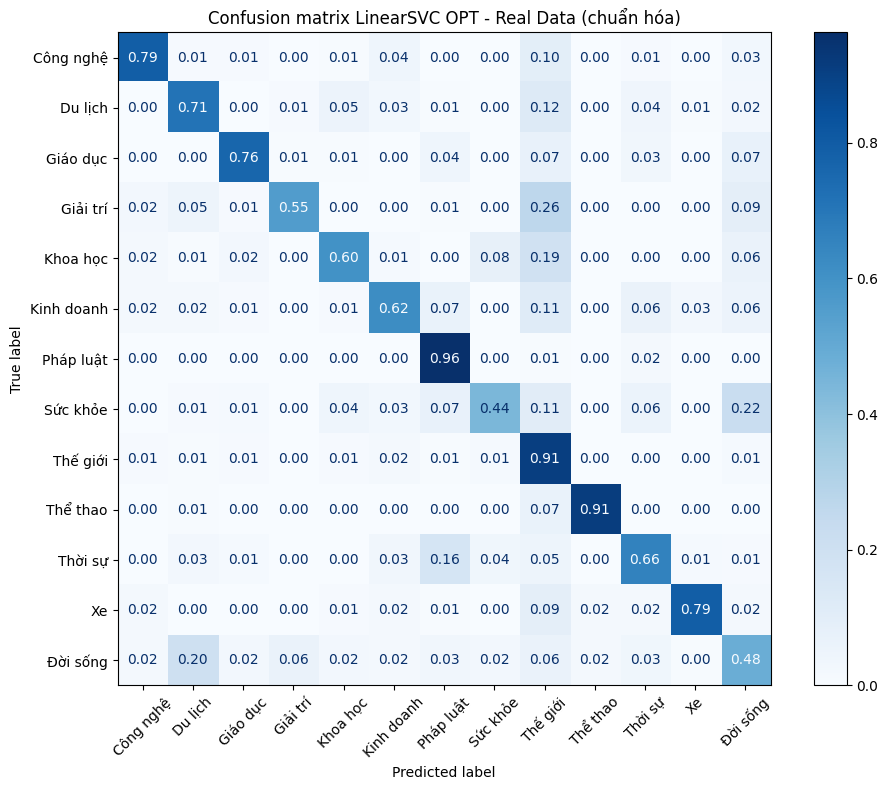

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


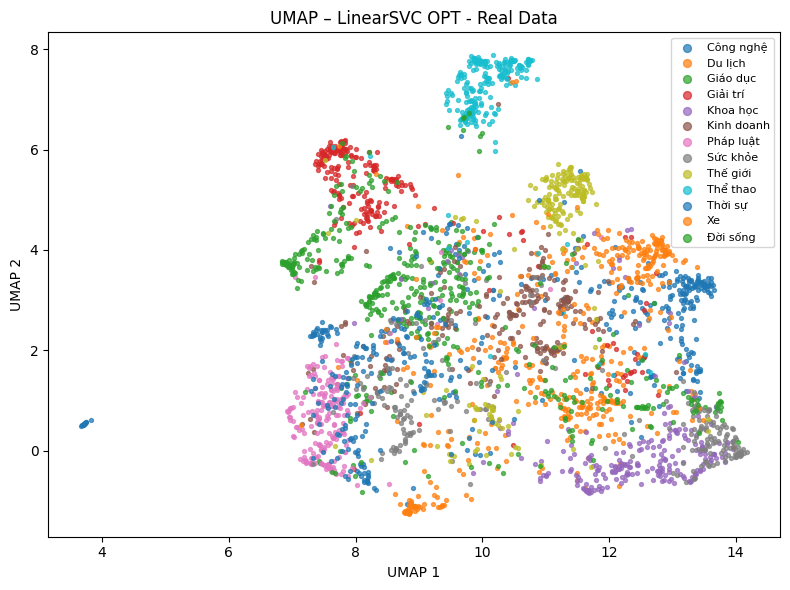

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import joblib
from sklearn.metrics import classification_report, accuracy_score, f1_score
from phobert_svm_pipeline import (
    evaluate_confusion_matrix,
    plot_umap_embeddings,
)

clf = joblib.load(f"{SVM_OPT_MODEL_DIR}")

X_test = np.load(f"{DATA_EMBEDDINGS_DIR}/X_emb.npy")
y_test = np.load(f"{DATA_EMBEDDINGS_DIR}/y.npy")

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {acc:.4f}")
print(f"F1-macro : {f1:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=LABEL_NAMES))


# 1) Confusion matrix (dùng EMBEDDING đã lưu -> không embed lại)
evaluate_confusion_matrix(
    clf,
    X_emb=X_test,
    y_true_labels=y_test,
    normalize=True,
    title="Confusion matrix LinearSVC OPT - Real Data",
    label_names=LABEL_NAMES
)

# 2) UMAP (dùng EMBEDDING đã lưu)
# Lưu ý: cần cài umap-learn trước khi chạy:  pip install umap-learn
plot_umap_embeddings(
    X_emb=X_test,
    y_int=y_test,
    label_names=LABEL_NAMES,
    max_points=3000,
    title="UMAP – LinearSVC OPT - Real Data"
)